In [ ]:
!git config --global user.name "Your GitHub viral1704"
!git config --global user.email "Your GitHub viralvaghasiya8@gmail.com"

In [ ]:
!git clone https://github.com/viral1704/interior-exterior-DL-project.git

Cloning into 'interior-exterior-DL-project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 56.14 KiB | 1.02 MiB/s, done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content
!ls /content/drive/MyDrive
!mv "/content/drive/My Drive/Deep learning/DL assignment.ipynb" /content/interior-exterior-DL-project/



drive  interior-exterior-DL-project  sample_data
 000003.jpg
 23ETCS126014_AMD502A_DataMining_LabManual.docx
'Ai lab.ipynb'
'AI&ML.ipynb'
'Auto Call Recorder'
 Classroom
'Colab Notebooks'
'Contact '
'Copy of 02_data_cleaning'
'Data Mining'
'Deep learning'
 GDToT
'Getting started.pdf'
'housing (1).csv'
 housing.csv
 housing.gsheet
 India_GDP_Data.csv
'introduction to machine learning.pdf'
 NLP
 PGM
'PGM ASSIGNMENT VIRAL.pdf'
 pract_1.ipynb
 Screenshot_2024-07-04-21-19-56-29_4336b74596784d9a2aa81f87c2016f50.jpg
 srinivis
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
'Untitled spreadsheet.gsheet'
 Vickysharex
'VIRAL PGM LAB_manual.pdf'
'viral resume (1).pdf'
'viral resume (2).pdf'
'viral resume (3).pdf'
'viral resume.pdf'


In [ ]:
!mv /content/drive/My Drive/Deep learning/DL assignment.ipynb /content/interior-exterior-DL-project/

mv: cannot stat '/content/drive/My': No such file or directory
mv: cannot stat 'Drive/Deep': No such file or directory
mv: cannot stat 'learning/DL': No such file or directory
mv: cannot stat 'assignment.ipynb': No such file or directory


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

# Path to the main dataset folder
dataset_path = '/content/drive/My Drive/Deep learning/1.csv'

# Create an ImageDataGenerator object for rescaling and data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% for validation

# Load the training data from the folder
train_generator = datagen.flow_from_directory(
    dataset_path,  # This is the path to the main folder
    target_size=(128, 128),  # Resize all images to 128x128 pixels
    batch_size=32,
    class_mode='binary',  # For two classes: car and bike like that(binary classification)
    subset='training'  # Use the training subset
)

# Load the validation data from the folder
validation_generator = datagen.flow_from_directory(
    dataset_path,  # Same main folder
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation'  # Use the validation subset
)

# Display the class indices
print(train_generator.class_indices)

Mounted at /content/drive
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
{'Exterior': 0, 'Interior': 1}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Data Augmentation and Rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Deep learning/1.csv',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',  # Binary classification: 'exterior' and 'interior'
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Deep learning/1.csv',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

# Step 3: Define the CNN Model
model = models.Sequential()

# Add Convolutional layers with MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for the dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification, use sigmoid


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Step 5: Train the Model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 389s 7s/step - accuracy: 0.5045 - loss: 0.7226 - val_accuracy: 0.6950 - val_loss: 0.6243
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7317 - loss: 0.5524 - val_accuracy: 0.6775 - val_loss: 0.6072
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8042 - loss: 0.4300 - val_accuracy: 0.6175 - val_loss: 0.6244
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8188 - loss: 0.4202 - val_accuracy: 0.6125 - val_loss: 0.7690
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8697 - loss: 0.3296 - val_accuracy: 0.6600 - val_loss: 0.6994
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8638 - loss: 0.3217 - val_accuracy: 0.6550 - val_loss: 0.7898
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9168 - loss: 0.2410 - val_accuracy: 0.6400 - val_loss: 0.8073
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9304 - loss: 0.1906 - val_accuracy: 0.6275 - val_loss: 1.0340
E

In [ ]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

from sklearn.metrics import classification_report
import numpy as np

# Predict the classes of validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Print precision, recall, F1-score
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.6463 - loss: 1.5948
Test accuracy: 0.6675000190734863
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 451ms/step
              precision    recall  f1-score   support

    Exterior       0.50      1.00      0.67       200
    Interior       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


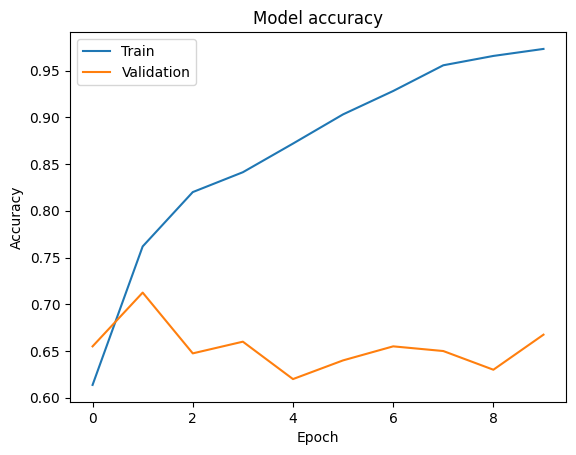

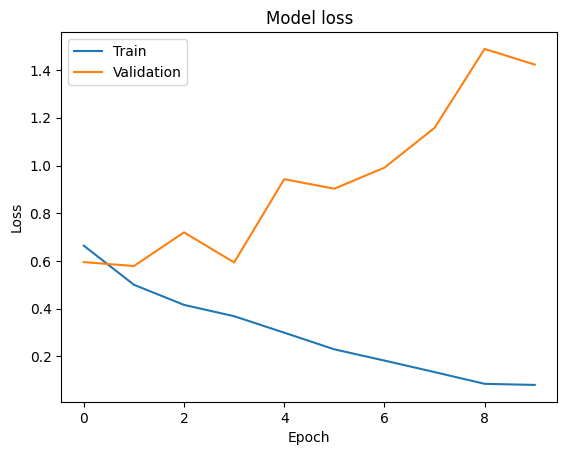

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
